## ==================== Libraries ====================

In [1]:
# Determinadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Procesamiento de imágenes
import cv2

### Load image

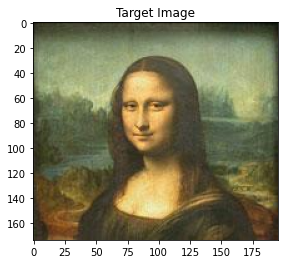

In [2]:
# Direcciones del dataset.
path = r'Datasets/Mona_Lisa_Up.jpg'

# Leer documento .csv.
target_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGBA)

# Imagen a numpy array.
target_img = np.asarray(target_img)

# Mostrar imagen.
plt.figure()
plt.imshow(target_img)
plt.title("Target Image")
plt.show()

### Parameters

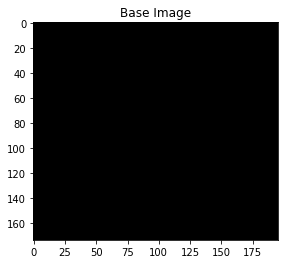

In [3]:
# Forma de la imagen.
height, width, channels = target_img.shape

# Imagen base.
base_img = np.zeros_like(target_img)
base_img[:,:,:] = 0
base_img[:,:,3:] = 255

# Mostrar imagen.
plt.figure()
plt.imshow(base_img)
plt.title("Base Image")
plt.show()

# Límites de las variables.
bounds = [[0,width], # Rango de la posición central 'X'.
          [0,height], # Rango de la posición central 'Y'.
          [5,width//2], # Rango del radio.
          [0,255], # Rango R.
          [0,255], # Rango G.
          [0,255], # Rango B.
          [0.3,1]] # Rango alpha.

### Objective function without alpha

In [4]:
# def objectiveFunction(P, X, Y):
#     # Variables.
#     x, y, radius, r, g, b, a = int(P[0]), int(P[1]), int(P[2]), P[3], P[4], P[5], P[6]

#     # Poner círculo.
#     candidate_img = np.copy(X)
#     cv2.circle(candidate_img, (x,y), radius, (r, g, b, 255), -1)

#     # Obtener la diferencia.
#     difference = np.abs(Y - candidate_img)
    
#     # Calcular la diferencia.
#     score = np.count_nonzero(difference)
    
#     return score

In [5]:
# def getCircleImage(P, X, Y):
#     # Variables.
#     x, y, radius, r, g, b, a = int(P[0]), int(P[1]), int(P[2]), P[3], P[4], P[5], P[6]

#     # Poner círculo.
#     circle_img = np.copy(X)
#     cv2.circle(circle_img, (x,y), radius, (r, g, b, 255), -1)
    
#     return circle_img

### Objective function with alpha

In [6]:
def objectiveFunction(P, X, Y):
    # Variables.
    x, y, radius, r, g, b, a = int(P[0]), int(P[1]), int(P[2]), P[3], P[4], P[5], P[6]

    # Poner círculo.
    candidate_img, overlay = np.copy(X), np.copy(X)
    cv2.circle(overlay, (x,y), radius, (r, g, b, 255), -1)
    candidate_img = cv2.addWeighted(overlay, a, candidate_img, 1-a, 0)
    
    # Obtener la diferencia.
    difference = np.abs(Y-candidate_img)
    
    # Calcular la diferencia.
    score = np.sum(difference)
    
    return score

In [7]:
def getCircleImage(P, X, Y):
    # Variables.
    x, y, radius, r, g, b, a = int(P[0]), int(P[1]), int(P[2]), P[3], P[4], P[5], P[6]

    # Poner círculo.
    circle_img, overlay = np.copy(X), np.copy(X)
    cv2.circle(overlay, (x,y), radius, (r, g, b, 255), -1)
    circle_img = cv2.addWeighted(overlay, a, circle_img, 1-a, 0)
    
    return circle_img

## <br><br><br><br>====================  Main ====================

In [8]:
from differential_evolution import differential_algorithm

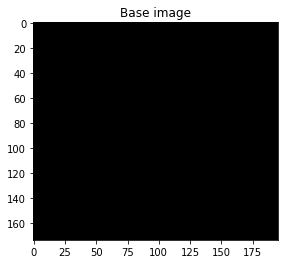

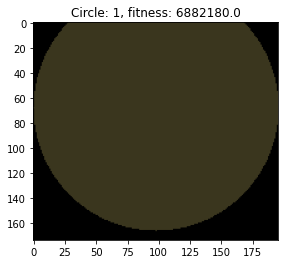

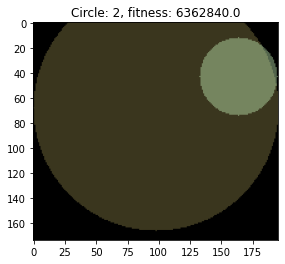

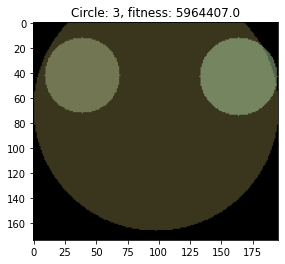

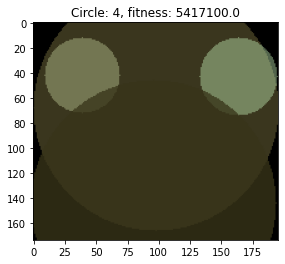

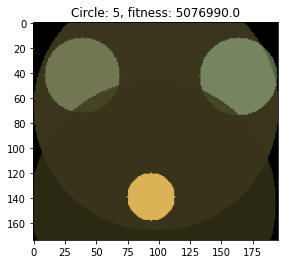

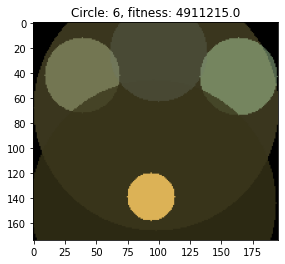

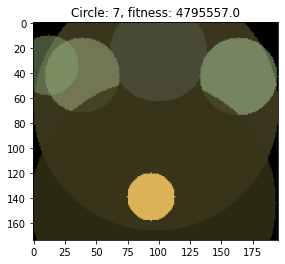

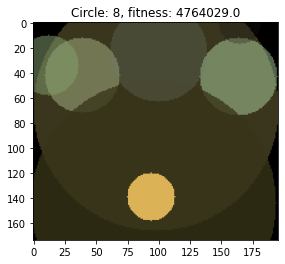

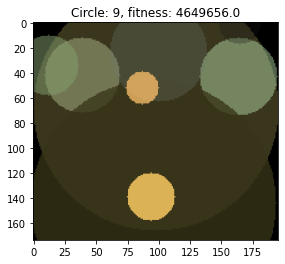

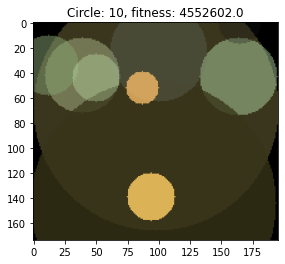

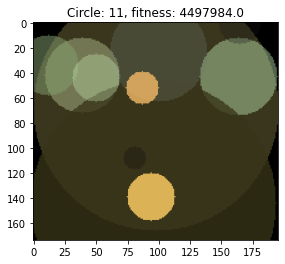

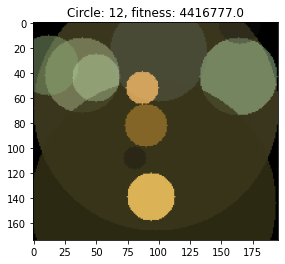

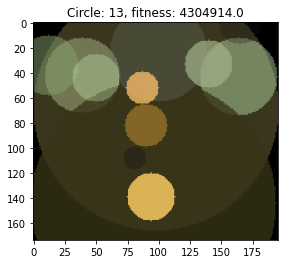

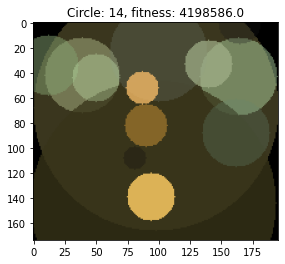

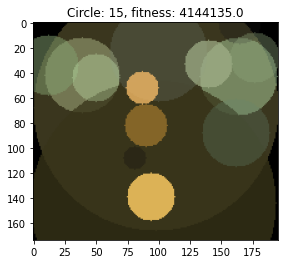

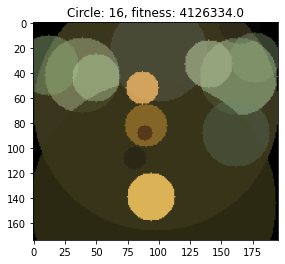

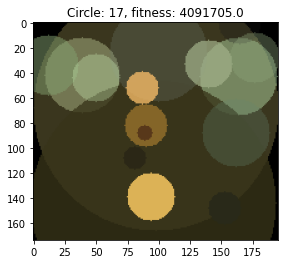

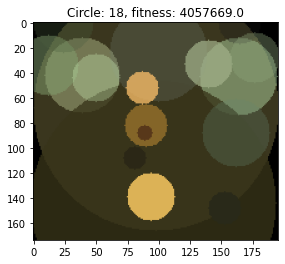

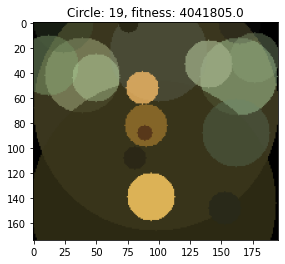

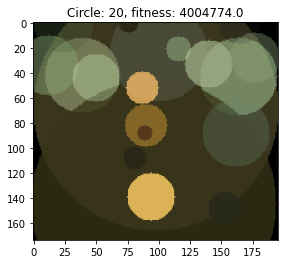

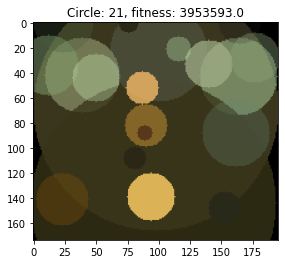

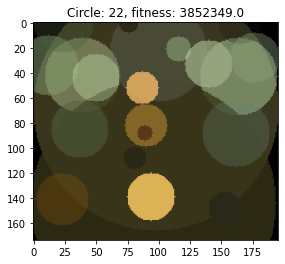

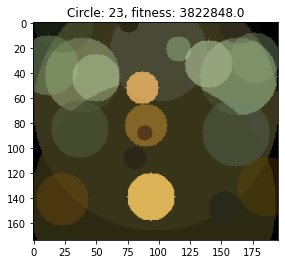

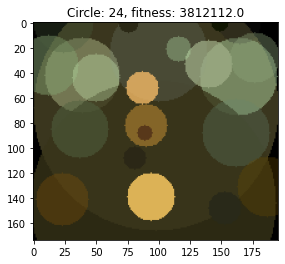

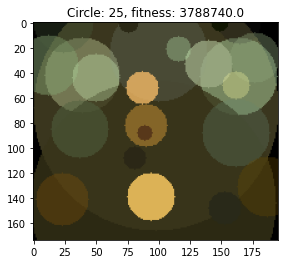

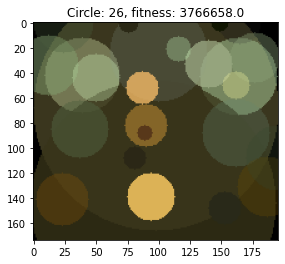

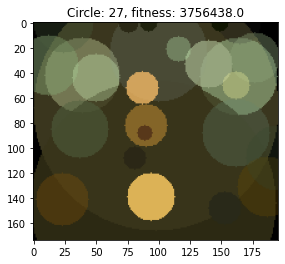

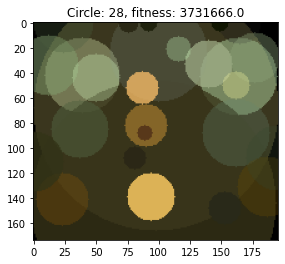

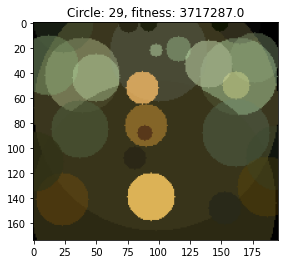

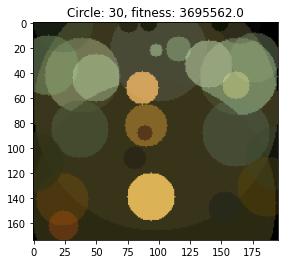

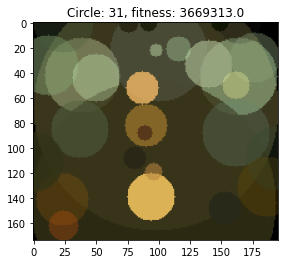

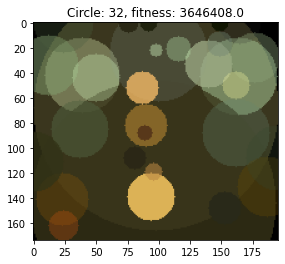

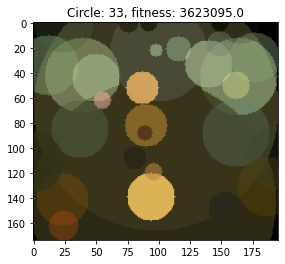

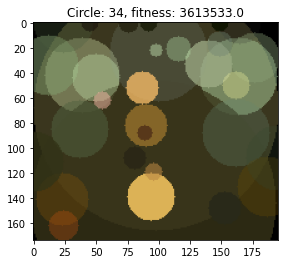

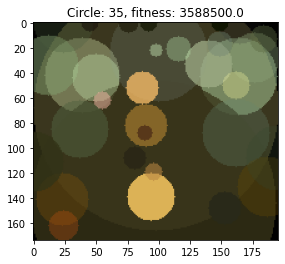

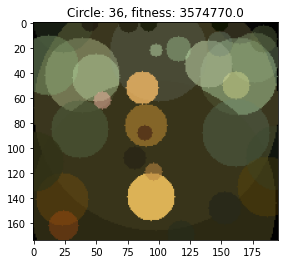

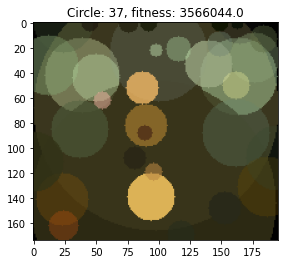

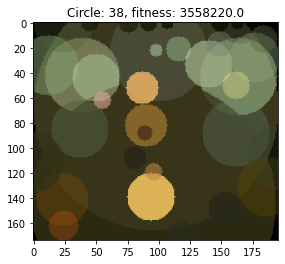

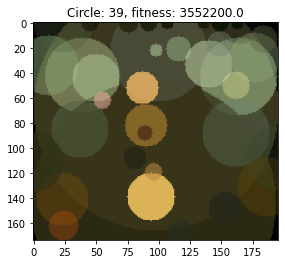

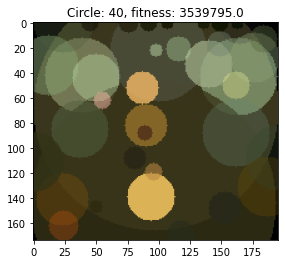

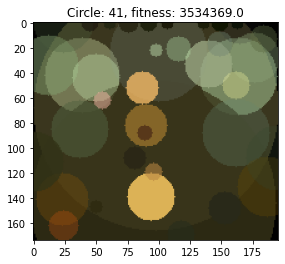

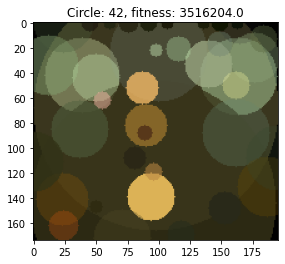

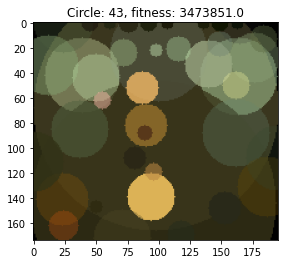

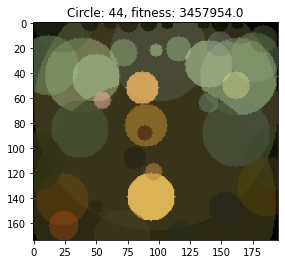

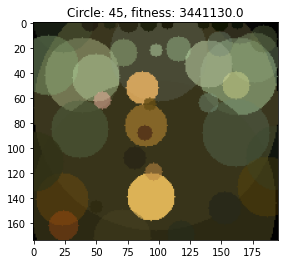

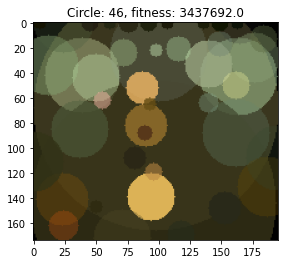

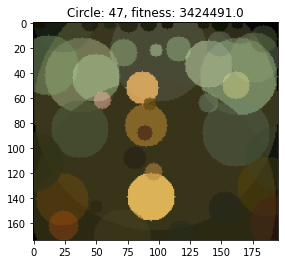

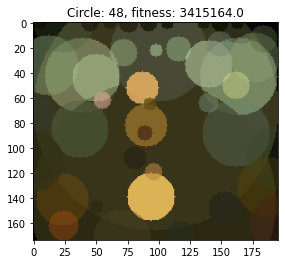

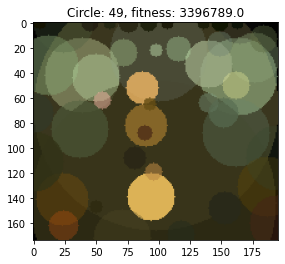

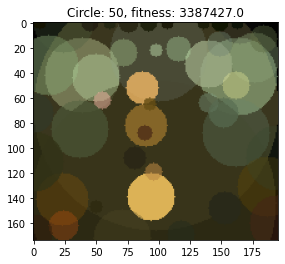

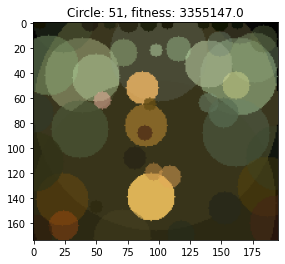

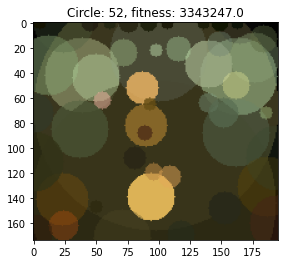

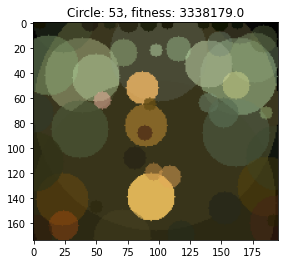

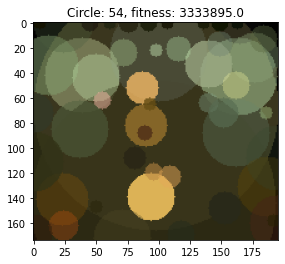

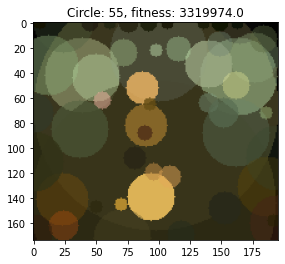

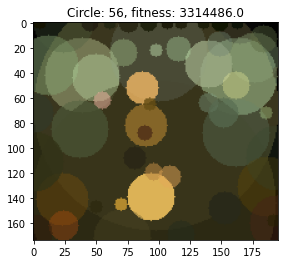

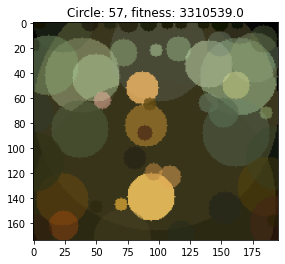

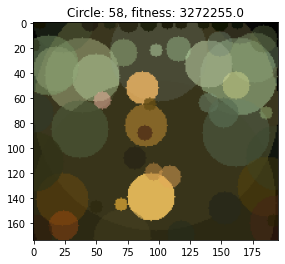

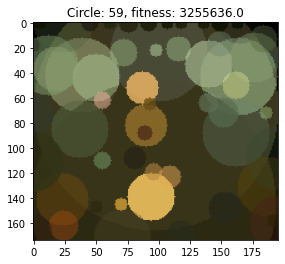

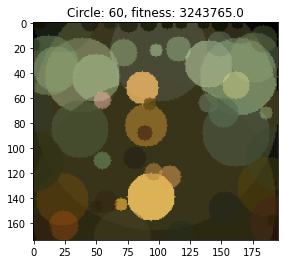

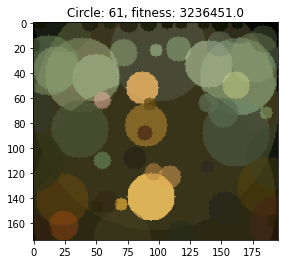

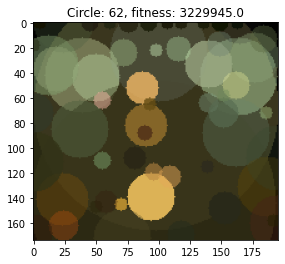

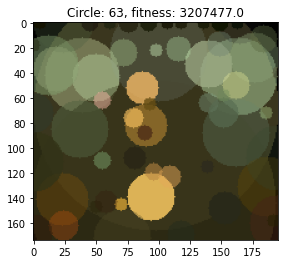

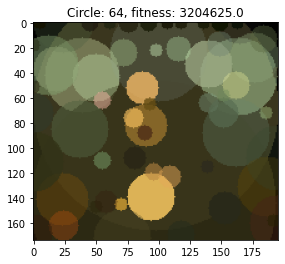

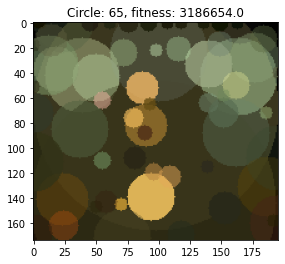

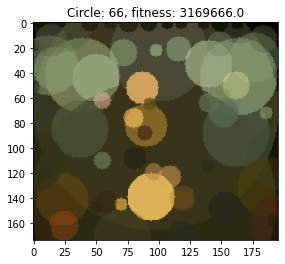

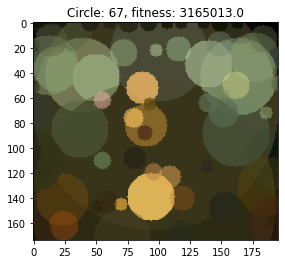

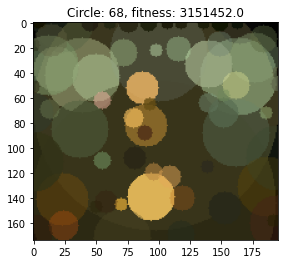

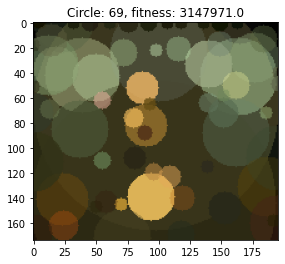

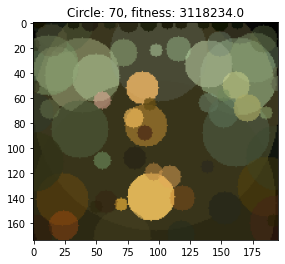

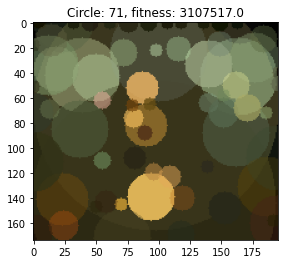

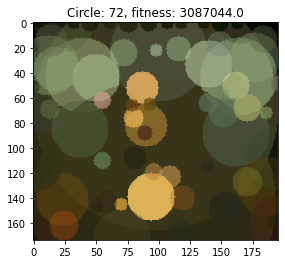

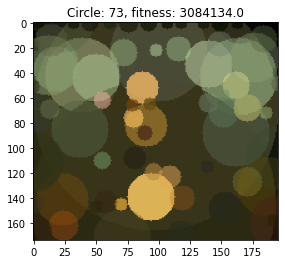

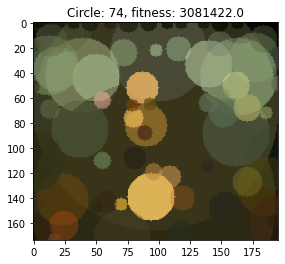

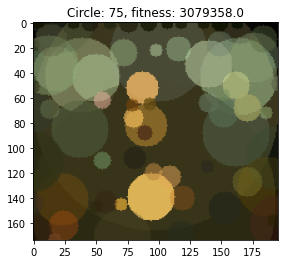

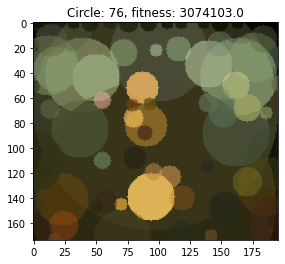

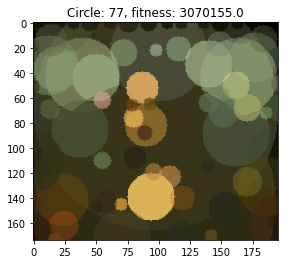

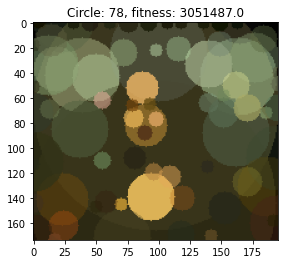

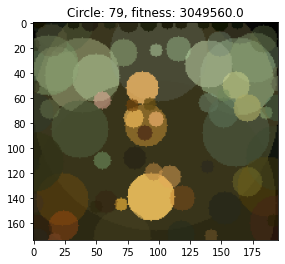

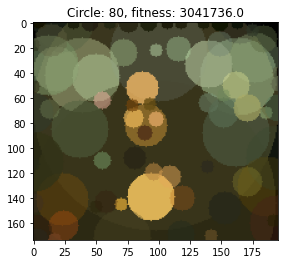

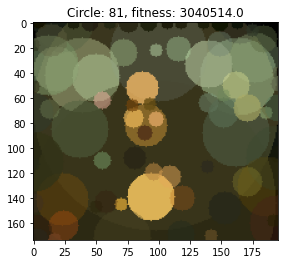

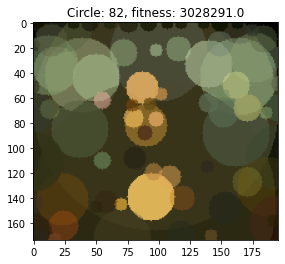

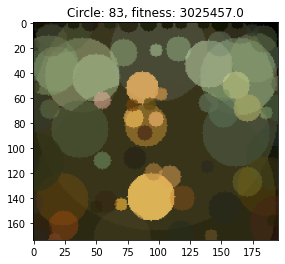

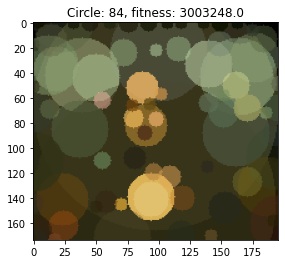

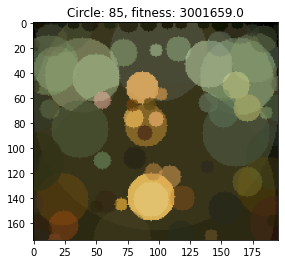

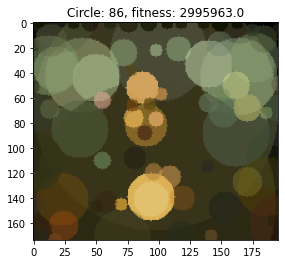

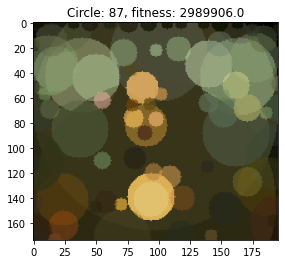

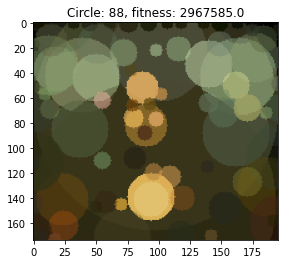

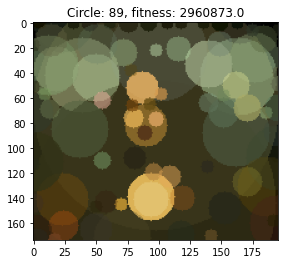

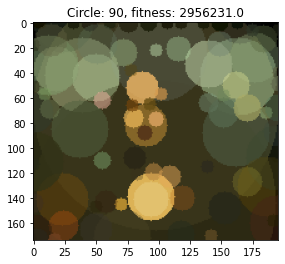

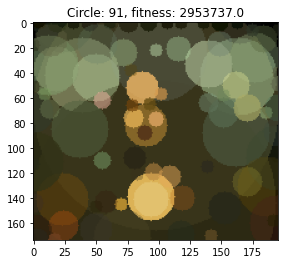

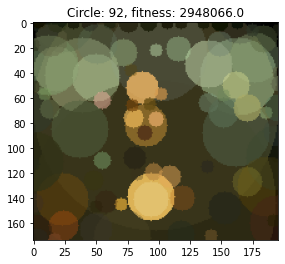

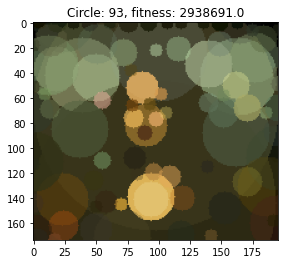

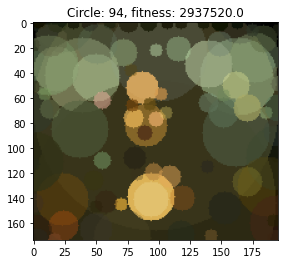

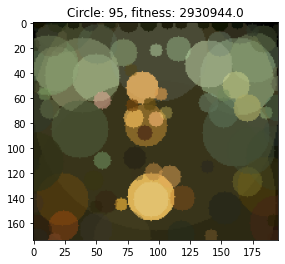

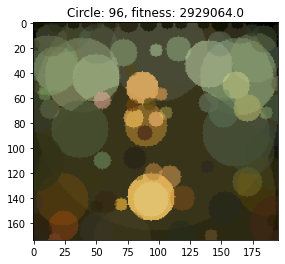

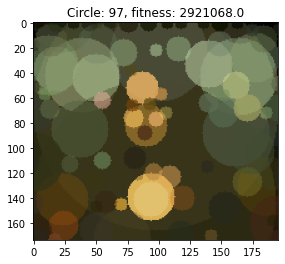

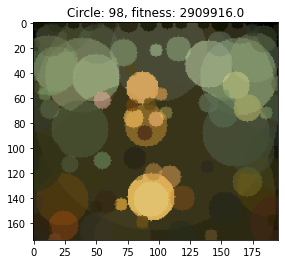

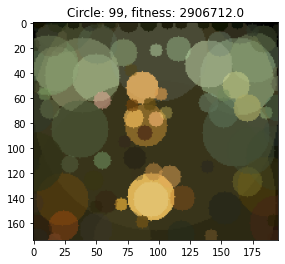

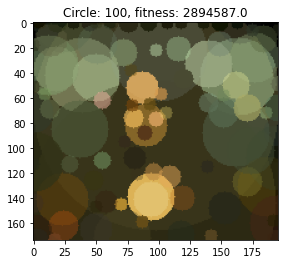

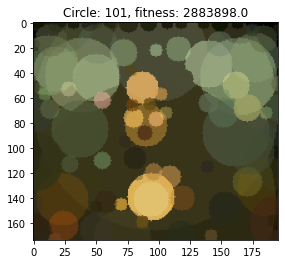

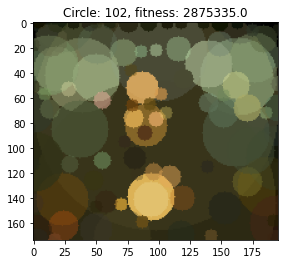

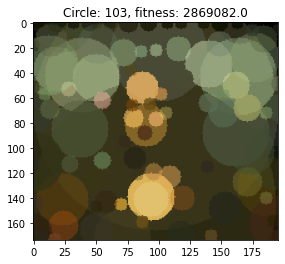

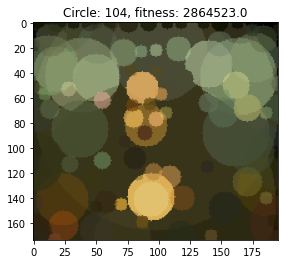

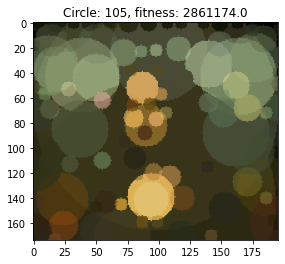

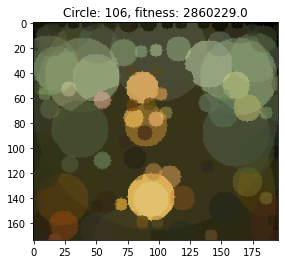

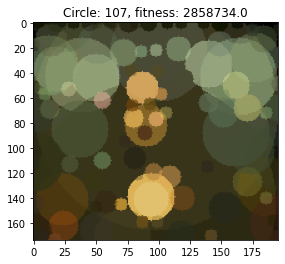

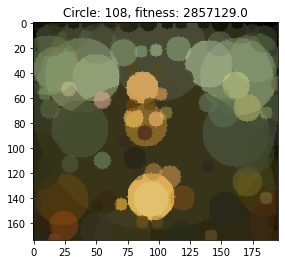

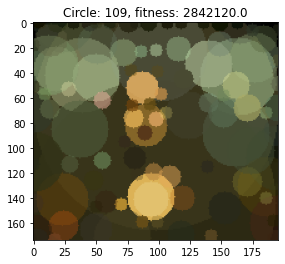

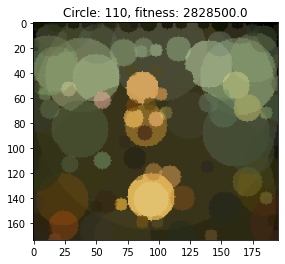

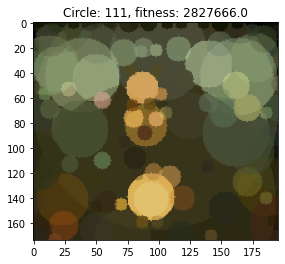

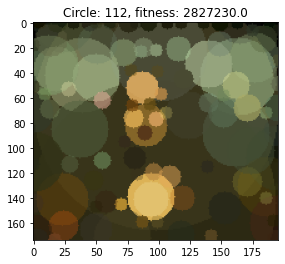

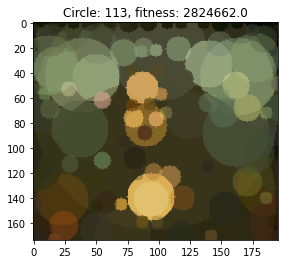

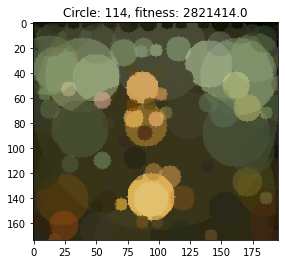

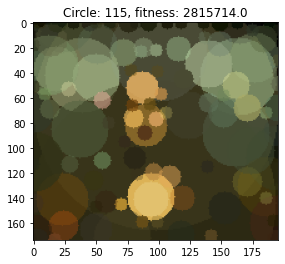

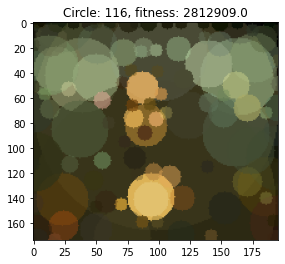

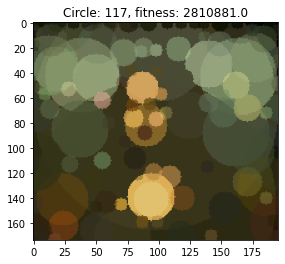

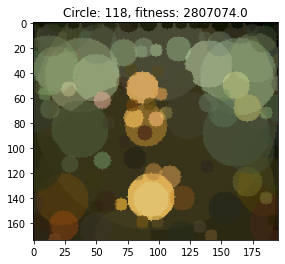

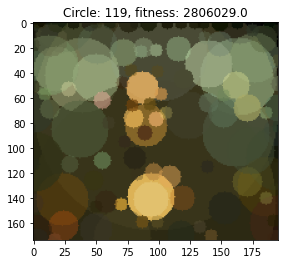

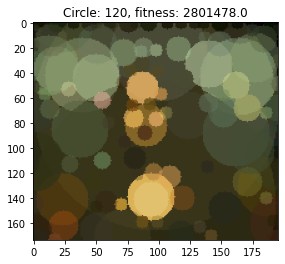

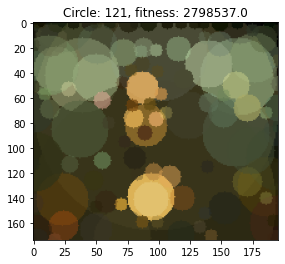

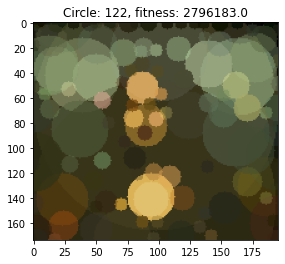

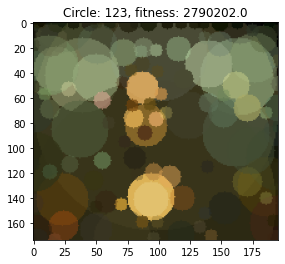

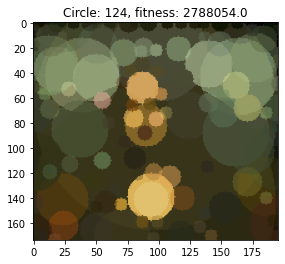

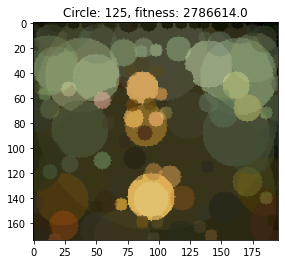

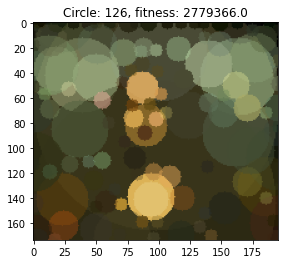

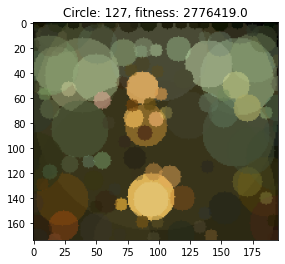

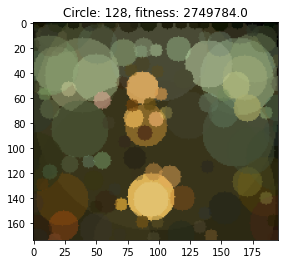

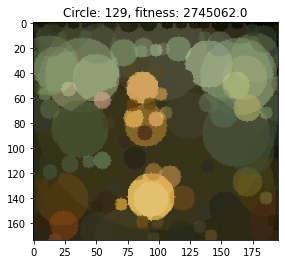

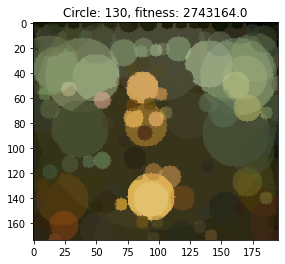

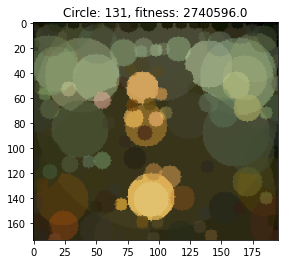

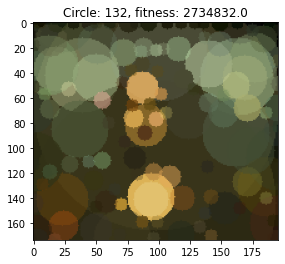

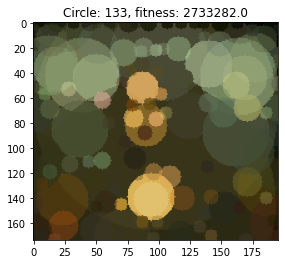

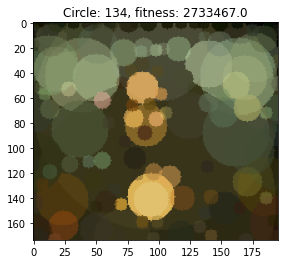

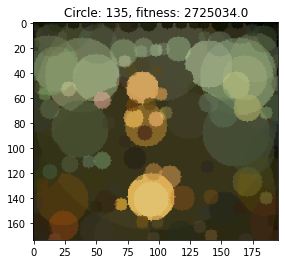

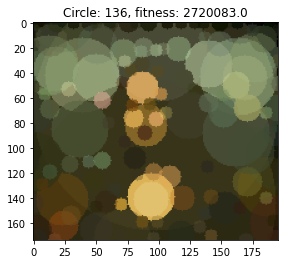

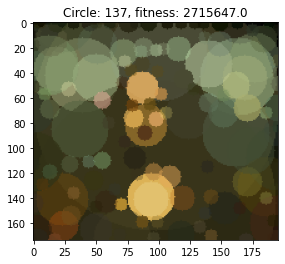

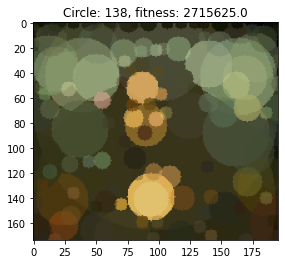

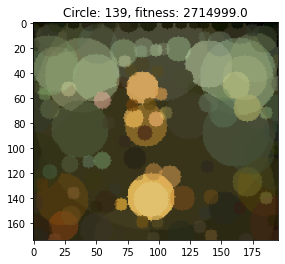

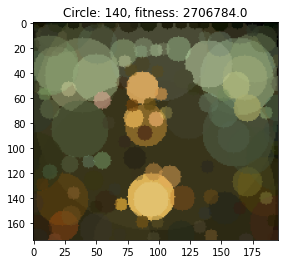

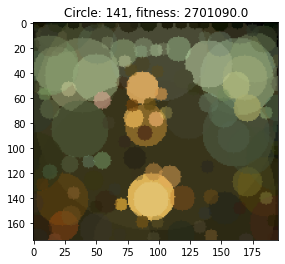

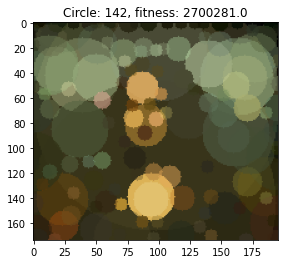

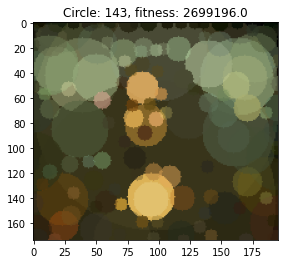

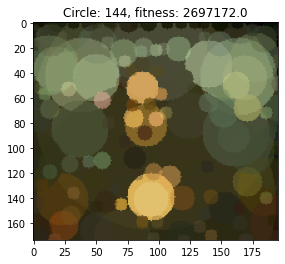

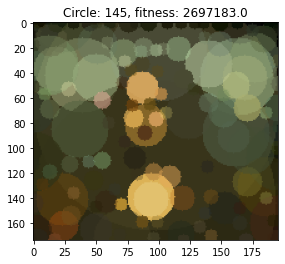

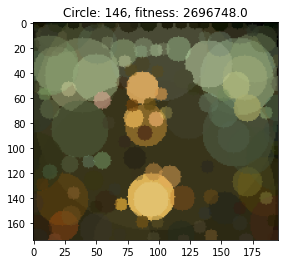

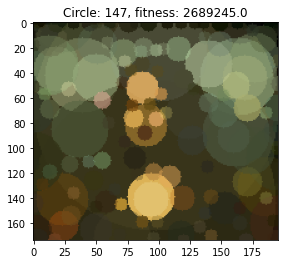

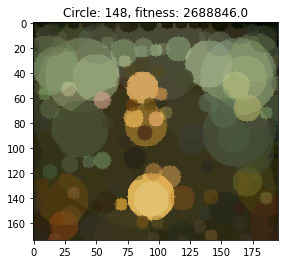

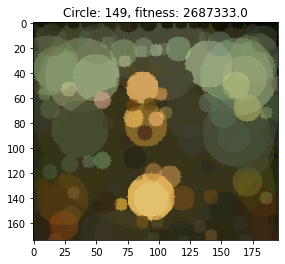

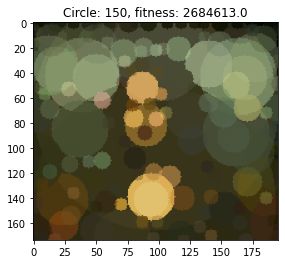

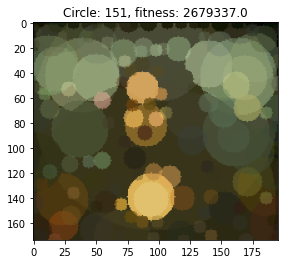

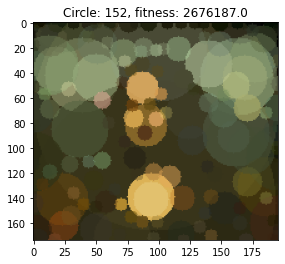

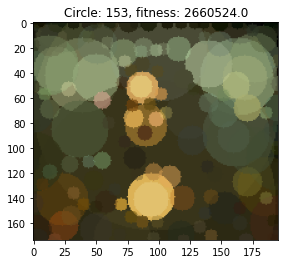

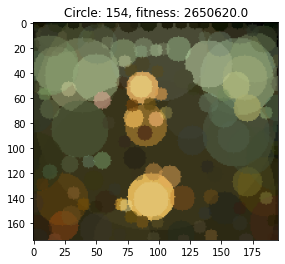

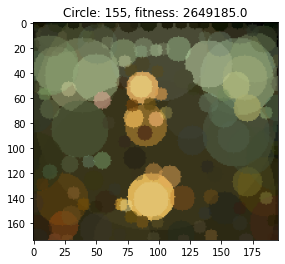

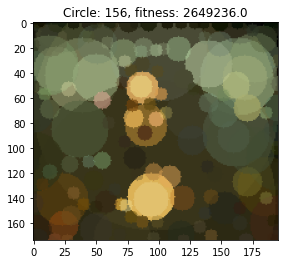

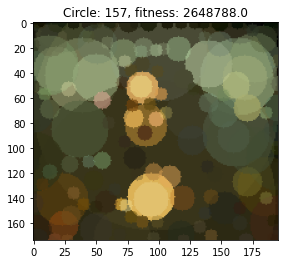

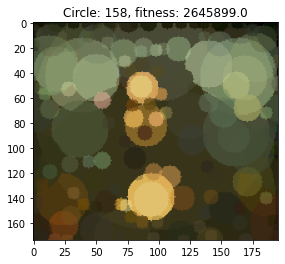

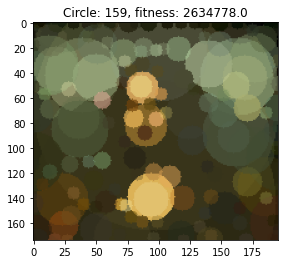

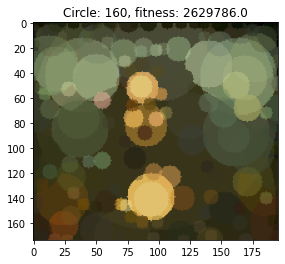

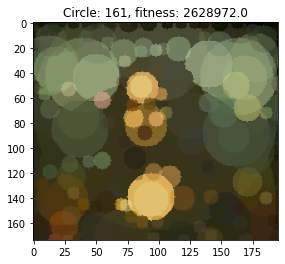

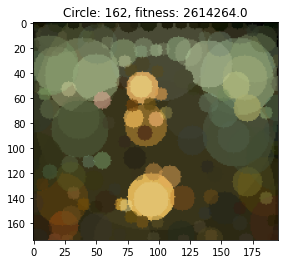

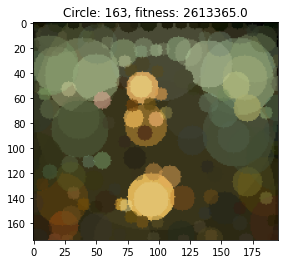

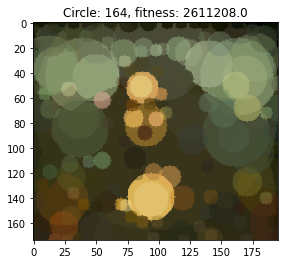

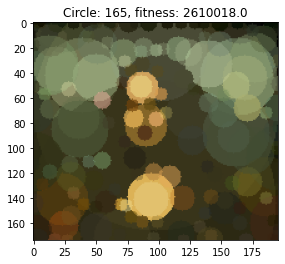

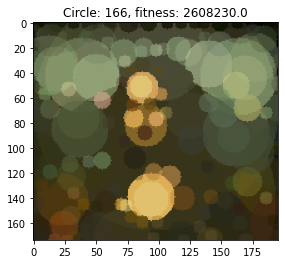

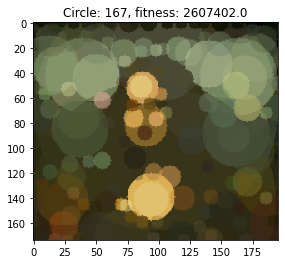

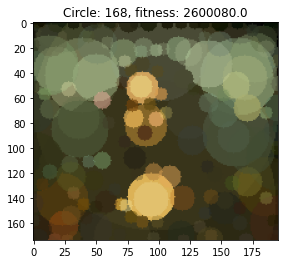

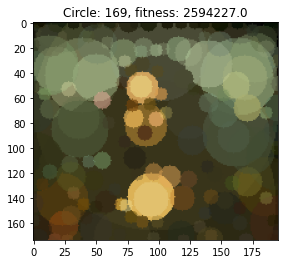

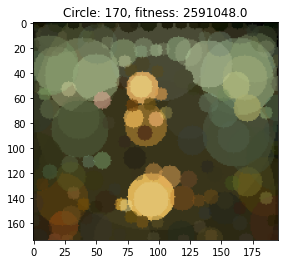

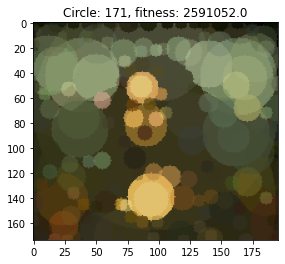

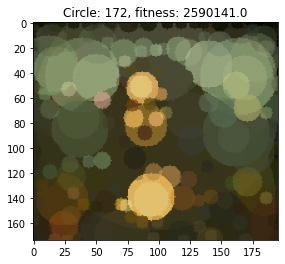

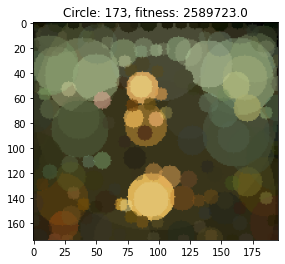

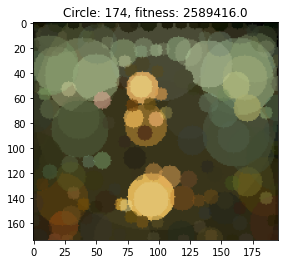

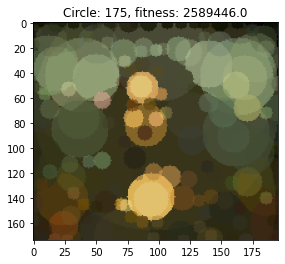

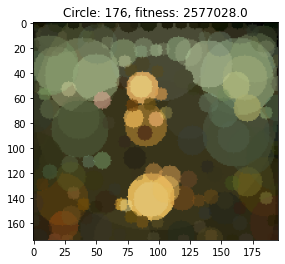

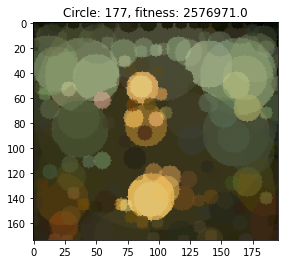

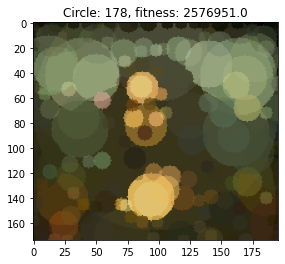

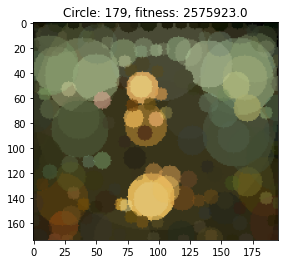

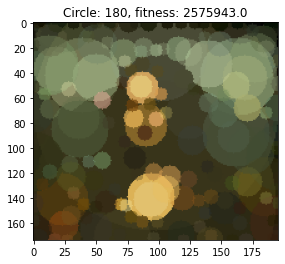

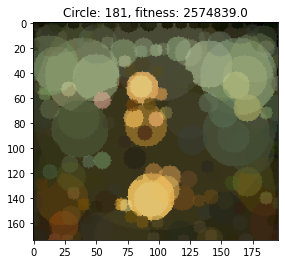

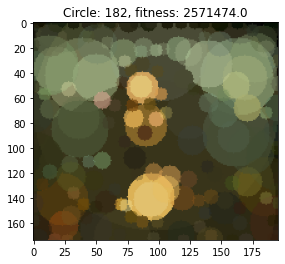

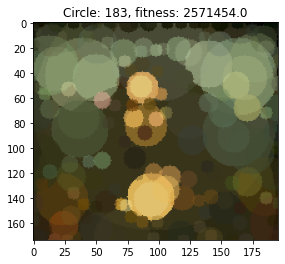

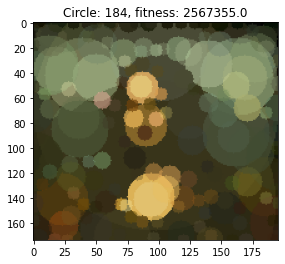

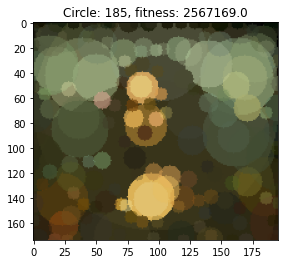

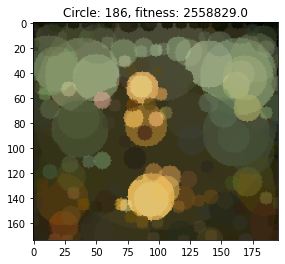

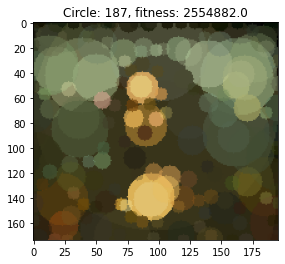

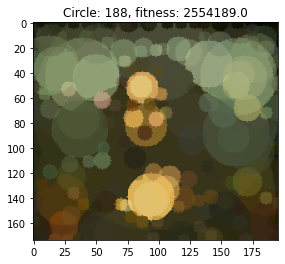

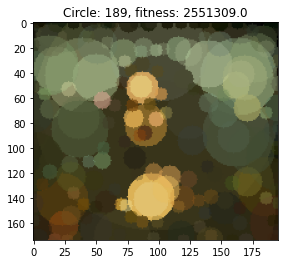

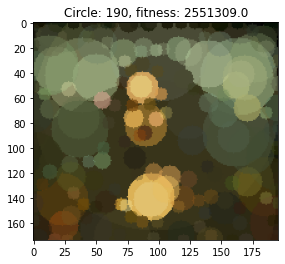

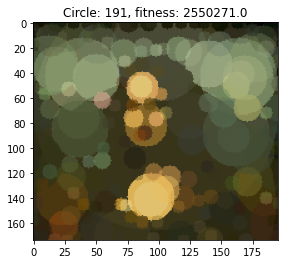

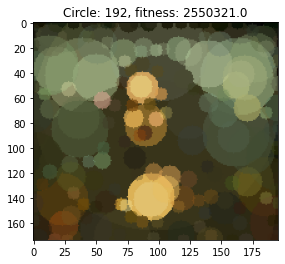

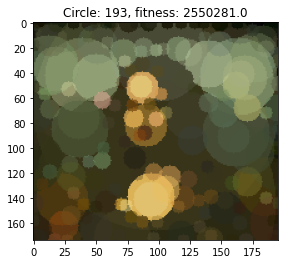

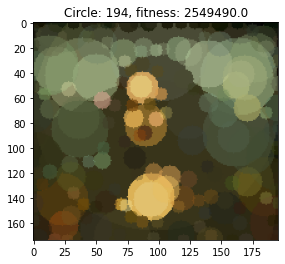

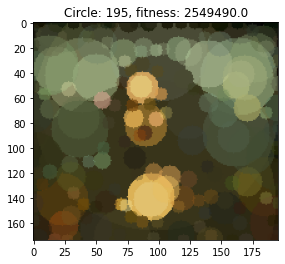

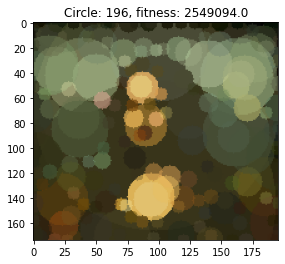

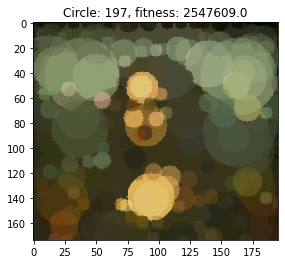

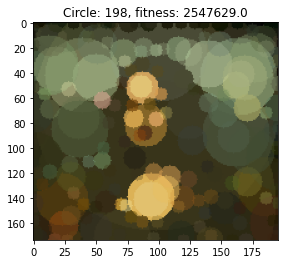

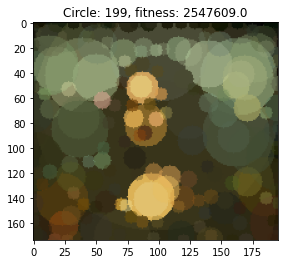

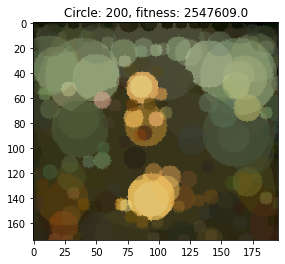

In [9]:
# Variables.
res_img = base_img.copy()
final_images = [res_img]
fun = float('inf')
no_circles = 200

# Mostrar imagen.
plt.figure()
plt.imshow(res_img)
plt.title("Base image")
plt.show()

# Poner la cantidad de círculos.
for i in range(no_circles):
    # Llamar al algoritmo.
    res = differential_algorithm(objectiveFunction, bounds, args=(res_img,target_img), popsize=30, ngen=500, cr=0.5)
    
    # Obtener la imagen del resultado del algoritmo.
    res_img = getCircleImage(res['P'], res_img, target_img)
    
    # Añadir a la lista.
    final_images.append(res_img)

    # Mostrar imagen.
    plt.figure()
    plt.imshow(res_img)
    plt.title("Circle: " + str(i+1) + ', fitness: ' + str(res['fun']))
    plt.show()